<a href="https://colab.research.google.com/github/spshreya/Data_science_projects/blob/main/Regression_Insureance_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/playground-series-s4e12

In [ ]:
import zipfile
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Replace 'your_file.zip' with the name of your uploaded ZIP file
zip_file = "playground-series-s4e12.zip"

# Create a directory to extract files
extract_to = "./extracted"
os.makedirs(extract_to, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted to:", extract_to)

Files extracted to: ./extracted


In [ ]:
import pandas as pd

# Adjust the path as needed
csv_file_path = os.path.join(extract_to, "train.csv")
train_df = pd.read_csv(csv_file_path)

In [ ]:
csv_file_path = os.path.join(extract_to, "test.csv")
test_df = pd.read_csv(csv_file_path)

In [ ]:
csv_file_path = os.path.join(extract_to, "sample_submission.csv")
sub_df = pd.read_csv(csv_file_path)

In [ ]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
sub_df.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545


In [ ]:
train_df.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [ ]:
train_df.shape

(1200000, 21)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [ ]:
train_df.isnull().sum()/train_df.shape[0]*100

,0
id,0.000000
Age,1.558750
Gender,0.000000
Annual Income,3.745750
Marital Status,1.544083
Number of Dependents,9.139333
Education Level,0.000000
Occupation,29.839583
Health Score,6.173000
Location,0.000000


In [ ]:
train_df[train_df['id'].duplicated()]

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount


In [ ]:
train_df.set_index('id', inplace=True)

In [ ]:
!pip install missingno

In [ ]:
import missingno as msno

<Axes: >

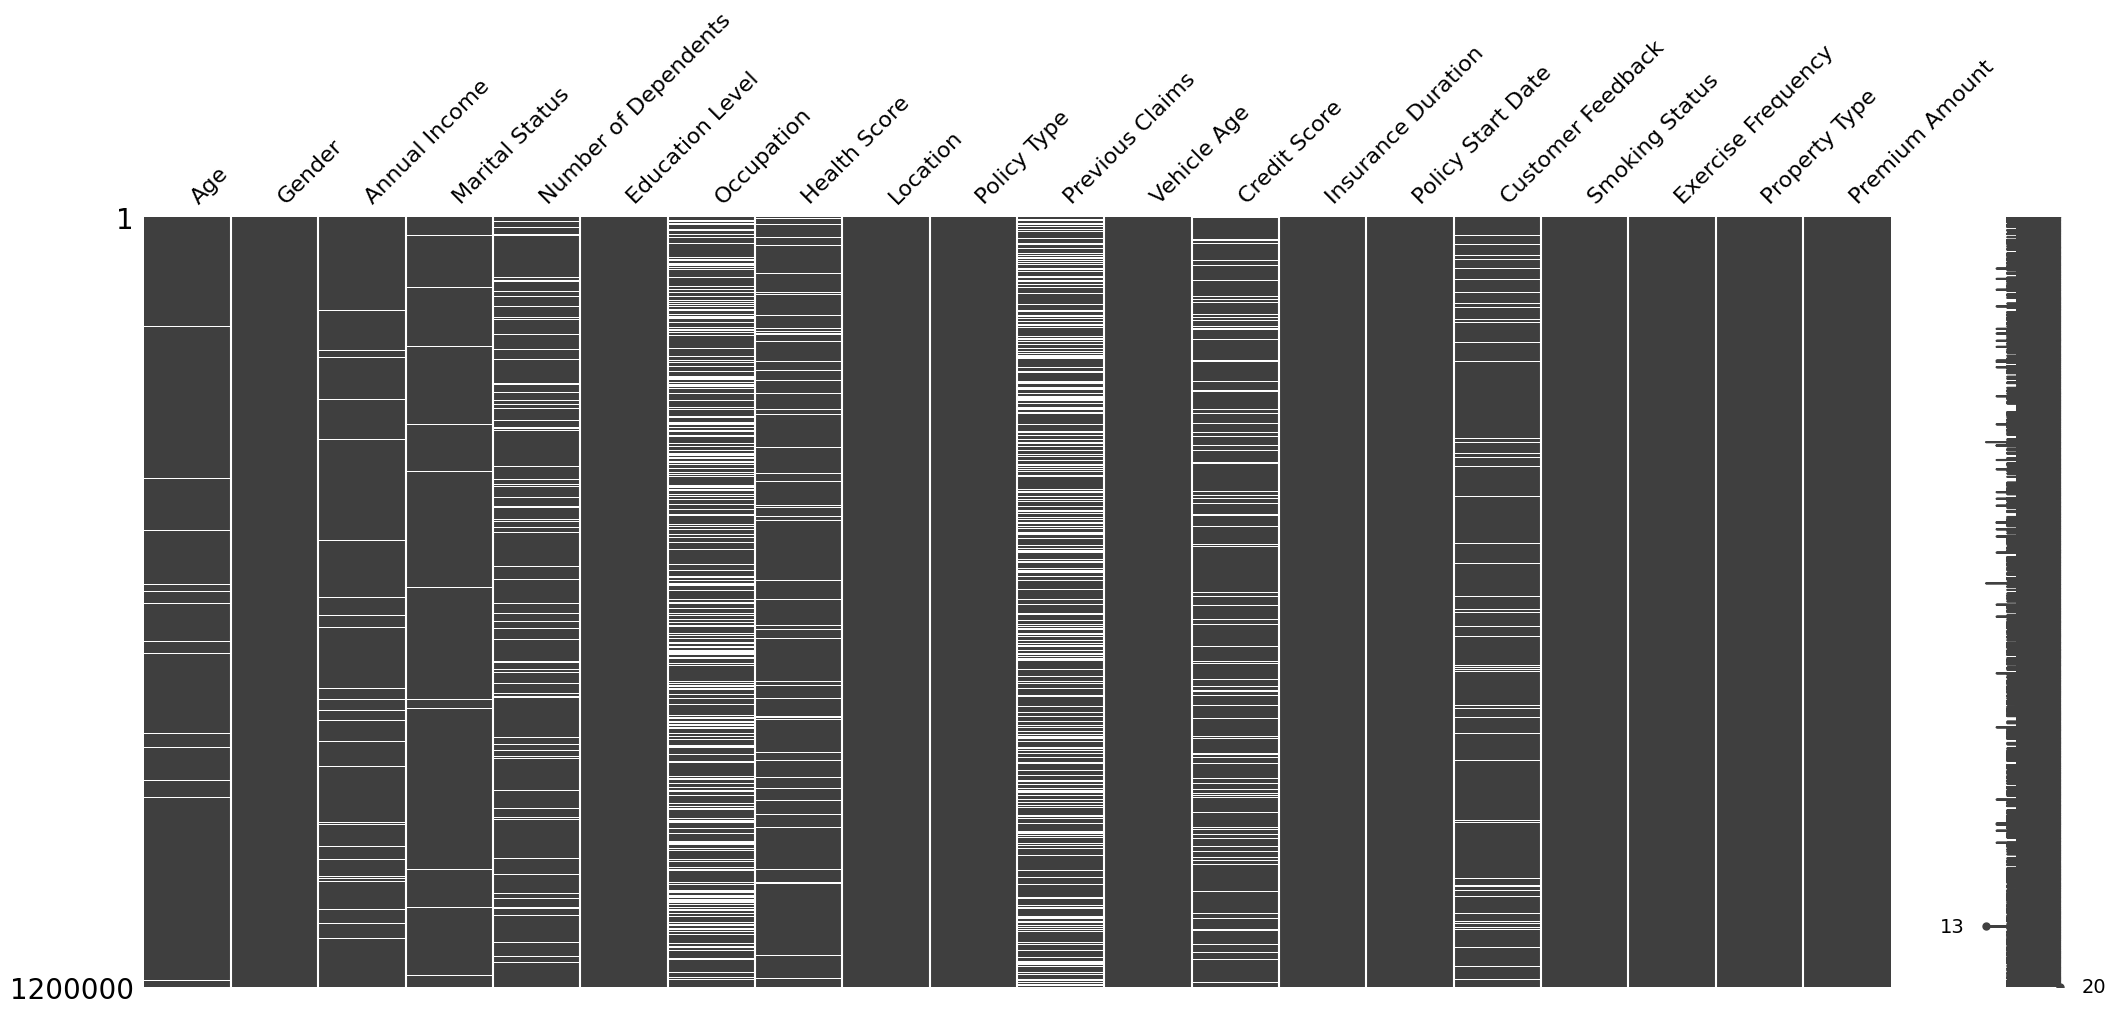

In [ ]:
msno.matrix(train_df)

In [ ]:
train_df.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


In [ ]:
train_df[train_df['Annual Income']==1]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
1013454,20.0,Female,1.0,Single,0.0,Bachelor's,NaN,34.244299,Urban,Comprehensive,1.0,9.0,752.0,7.0,2023-05-31 15:21:39.263607,Good,No,Daily,Apartment,2063.0


In [ ]:
train_df.loc[train_df['Annual Income'] == 1, 'Annual Income'] = np.nan

In [ ]:
train_df[train_df['Annual Income']==1]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,


In [ ]:
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])

In [ ]:
print(train_df['Policy Start Date'].min(), train_df['Policy Start Date'].max())

2019-08-17 15:21:39.080371 2024-08-15 15:21:39.287115


In [ ]:
train_df.describe(include=['object'])

,Gender,Marital Status,Education Level,Occupation,Location,Policy Type,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,1200000,1181471,1200000,841925,1200000,1200000,1122176,1200000,1200000,1200000
unique,2,3,4,3,3,3,3,2,4,3
top,Male,Single,Master's,Employed,Suburban,Premium,Average,Yes,Weekly,House
freq,602571,395391,303818,282750,401542,401846,377905,601873,306179,400349


In [ ]:
df = train_df.copy()

In [ ]:
df[['Gender', 'Marital Status', 'Education Level', 'Occupation',
    'Location','Policy Type', 'Customer Feedback',
    'Smoking Status', 'Exercise Frequency', 'Property Type']] = df[['Gender', 'Marital Status', 'Education Level', 'Occupation',
                                                                    'Location','Policy Type', 'Customer Feedback',
                                                                    'Smoking Status', 'Exercise Frequency', 'Property Type']].apply(pd.to_numeric, errors='coerce')


In [ ]:
df[df['Premium Amount'].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,


In [ ]:
df.dropna(subset=['Premium Amount'], inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


df.drop('Policy Start Date', axis=1, inplace=True)
# Prepare the features (X) and target (y)
X = df.drop('Premium Amount', axis=1)
y = df['Premium Amount']

# Initialize and fit a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

In [ ]:
# Get feature importance
feature_importance = model.feature_importances_


In [ ]:
# Display feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)